In [1]:
# Load Modules and Functions
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wooldridge as woo

Creating synthetic dataset

In [2]:
# create synthatic data with two different meaned groups
# The first thousand observations will be the control and the second thousand are the treatment
heights = np.append(np.random.normal(69, 3, 1000), np.random.normal(69.5, 3, 1000))

In [3]:
# Build Dataframe
height_data = pd.DataFrame([heights]).T
height_data.columns =["Height"]

# Assign the treatment and control groups an indicator variable
height_data["Milk_Group"] = 0
height_data.loc[1000: ,"Milk_Group"]= 1

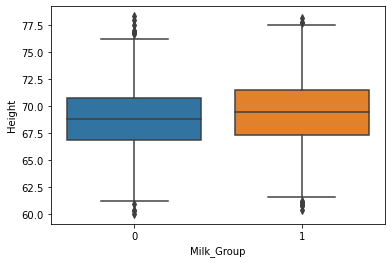

In [4]:
sns.boxplot(y = "Height", x = "Milk_Group", data = height_data)
plt.show()

# Estimate Treatment effect

Here we assume that the groups have been completely randomly assigned.

$$height_i = \beta_1 + \beta_2 d_i + e_i= \beta_0 + \beta_1 milk_i + e_i$$

In [5]:
treat_model = smf.ols('Height ~ Milk_Group', height_data).fit()
treat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     10.46
Date:                Tue, 29 Nov 2022   Prob (F-statistic):            0.00124
Time:                        21:49:34   Log-Likelihood:                -5051.4
No. Observations:                2000   AIC:                         1.011e+04
Df Residuals:                    1998   BIC:                         1.012e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.9294      0.096    720.318      0.000      68.742      69.117
Milk_Group     0.4377      0.135      3.234      0.001       0.172       0.703
==============================================================================
Omnibus:                        0.620   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.649
Skew:                           0.042   Prob(JB):                        0.723
Kurtosis:                       2.973   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

thus $d_i$ is about .57, close to our what we expected

## Adding predictor variables

In [6]:
# add in some predictors
mom_height = np.random.normal(63.5, 2.5, 2000)
dad_height = np.random.normal(69, 3, 2000)
milk_treatment = np.random.choice([0,1], 2000)



height = .5 * mom_height + .5 * dad_height + .5*milk_treatment + np.random.normal(0,1, 2000)

data = pd.DataFrame([height, mom_height, dad_height, milk_treatment]).T
data.columns = ["height", "mom_height", "dad_height", "milk_treatment"]

# add in some counties
counties = ["Santa Barbara", "Ventura", "LA", "Orange", "Alameda", "Merced", "Riverside" "San Diego"]
data["county"] = np.random.choice(counties,2000)

In [7]:
data.merge(pd.get_dummies(data.county), left_index = True, right_index = True)

,height,mom_height,dad_height,milk_treatment,county,Alameda,LA,Merced,Orange,RiversideSan Diego,Santa Barbara,Ventura
0,67.352998,63.166549,67.280786,1.0,Ventura,0,0,0,0,0,0,1
1,66.072666,63.762336,66.270218,1.0,LA,0,1,0,0,0,0,0
2,69.236464,64.393787,70.201838,1.0,LA,0,1,0,0,0,0,0
3,70.488617,66.335122,72.342331,1.0,RiversideSan Diego,0,0,0,0,1,0,0
4,67.985056,64.235193,69.378462,0.0,Orange,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,71.112660,67.578450,73.072078,0.0,Merced,0,0,1,0,0,0,0
1996,63.148581,60.333128,66.549110,1.0,Santa Barbara,0,0,0,0,0,1,0
1997,67.834624,63.092551,69.881953,1.0,LA,0,1,0,0,0,0,0
1998,63.447456,60.815627,66.467445,1.0,Merced,0,0,1,0,0,0,0


### Fixed Effects

In [8]:
treat_model2 = smf.ols('height ~ mom_height + dad_height+ milk_treatment+ county', data).fit()
treat_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     841.3
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:49:34   Log-Likelihood:                -2845.3
No. Observations:                2000   AIC:                             5711.
Df Residuals:                    1990   BIC:                             5767.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.2521      0.765      1.636      0.102      -0.248       2.753
county[T.LA]                    -0.1481      0.083     -1.784      0.075      -0.311       0.015
county[T.Merced]                -0.0229      0.082     -0.279      0.780      -0.184       0.138
county[T.Orange]                 0.0701      0.084      0.835      0.404      -0.094       0.235
county[T.RiversideSan Diego]     0.0874      0.084      1.038      0.299      -0.078       0.253
county[T.Santa Barbara]          0.0870      0.084      1.041      0.298      -0.077       0.251
county[T.Ventura]                0.0123      0.085      0.145      0.885      -0.155       0.179
mom_height                       0.4890      0.009     55.041      0.000       0.472       0.506
dad_height                       0.4917      0.007     65.700      0.000       0.477       0.506
milk_treatment                   0.5567      0.045     12.353      0.000       0.468       0.645
==============================================================================
Omnibus:                        3.140   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.071
Skew:                          -0.076   Prob(JB):                        0.215
Kurtosis:                       3.118   Cond. No.                     3.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
test_model = smf.ols('milk_treatment ~ mom_height + dad_height', data).fit()
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         milk_treatment   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08000
Date:                Tue, 29 Nov 2022   Prob (F-statistic):              0.923
Time:                        21:49:34   Log-Likelihood:                -1450.3
No. Observations:                2000   AIC:                             2907.
Df Residuals:                    1997   BIC:                             2923.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5127      0.378      1.356      0.175      -0.229       1.254
mom_height     0.0009      0.004      0.206      0.837      -0.008       0.010
dad_height    -0.0013      0.004     -0.344      0.731      -0.009       0.006
==============================================================================
Omnibus:                     7187.304   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.229
Skew:                           0.070   Prob(JB):                     4.37e-73
Kurtosis:                       1.005   Cond. No.                     3.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Difference-in-Differences

In [10]:
mom_height = np.random.normal(63.5, 2.5, 2000)
dad_height = np.random.normal(69, 3, 2000)
milk_treatment = np.random.choice([0,1], 2000)

after = np.random.choice([0,1], 2000)

height = .5*mom_height + .5* dad_height + 2*after + milk_treatment+ 2*after*milk_treatment+np.random.normal(0,1, 2000)

data = pd.DataFrame([height, mom_height, dad_height, milk_treatment, after]).T
data.columns = ["height", "mom_height", "dad_height", "milk_treatment", "after"]

<Figure size 1080x720 with 0 Axes>

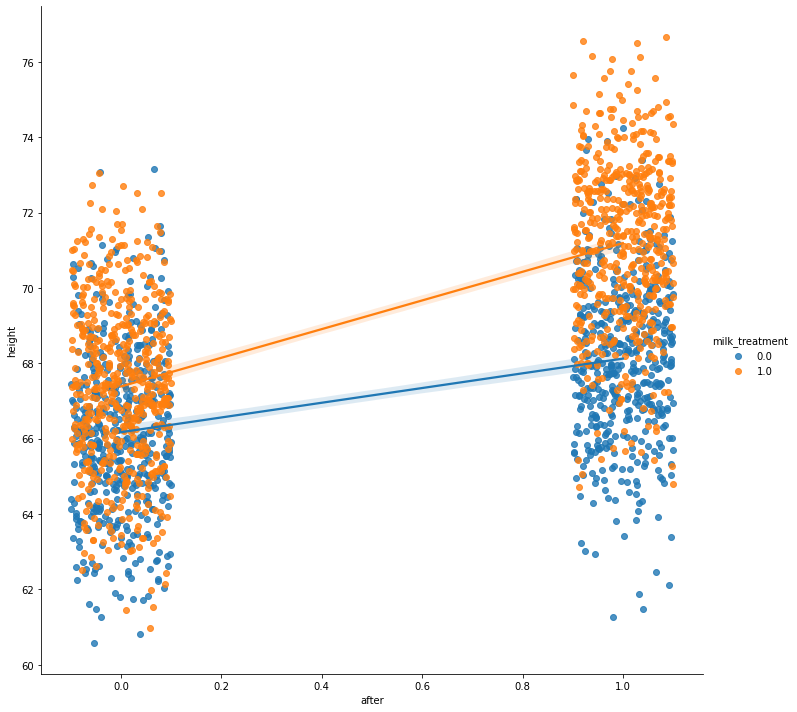

In [11]:
plt.figure(figsize = (15, 10))
sns.lmplot(x = "after", y = "height", hue = "milk_treatment",data = data, height = 10, x_jitter = .1) 

In [12]:
# Test is to regress our treatment on teh predictors
test_model = smf.ols('height ~ mom_height + dad_height + after*milk_treatment ', height_data).fit()
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     3003.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:49:34   Log-Likelihood:                -2805.2
No. Observations:                2000   AIC:                             5622.
Df Residuals:                    1994   BIC:                             5656.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7109      0.761     -0.935      0.350      -2.203       0.781
mom_height               0.5125      0.009     58.017      0.000       0.495       0.530
dad_height               0.4991      0.007     68.092      0.000       0.485       0.513
after                    1.9278      0.063     30.382      0.000       1.803       2.052
milk_treatment           1.0107      0.062     16.325      0.000       0.889       1.132
after:milk_treatment     2.0146      0.088     22.839      0.000       1.842       2.188
==============================================================================
Omnibus:                        2.857   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.763
Skew:                          -0.084   Prob(JB):                        0.251
Kurtosis:                       3.069   Cond. No.                     3.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Instrumental Variables

In [13]:
wage = woo.data('WAGE2')

$$log(wage)= \beta_0 + \beta_1 educ + u$$

We believe that educ is likely endogenous (correlated with the error term). The classic example of why is that people who are more talented or have greater general ability likely perform well in school and on the job market. Thus we would like to find an instrument that can strip out this correlation.

The goal is to find an instrument that is correlated with education and but not the error term (which includes items like ability) in the regression.

Number of siblings is a candidate instrument. We know that children with more siblings tend to have lower levels of education. The second assumptiopn is mroe difficult to verify. Is it possible that the number of siblings is correlated with ability?

    More siblings -> less parent attention -> lower ability -> lower wages and education

Two stage least squares steps:

    1. Regress education on nsibs:
$$\hat{educ} = \beta_0 - \beta_1 sibs$$

    2. Save the fitted values from the previopus regression
    
    3. Regress log(wage) on the fitted values for education:
    
$$log(wage) = \beta_0 - \beta_1 \hat{educ}$$

Note that the manual implementation of the above process computes incorrect standard errors. the IV2SLS method will return corrected errors that account for the two stage structure of the regression.

### Manual Implementation

In [14]:
stage1 = smf.ols('educ~sibs', wage).fit()
stage1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     56.67
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.22e-13
Time:                        21:49:34   Log-Likelihood:                -2034.4
No. Observations:                 935   AIC:                             4073.
Df Residuals:                     933   BIC:                             4083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.1388      0.113    124.969      0.000      13.917      14.361
sibs          -0.2279      0.030     -7.528      0.000      -0.287      -0.168
==============================================================================
Omnibus:                       69.595   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.996
Skew:                           0.512   Prob(JB):                     6.93e-13
Kurtosis:                       2.376   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note the very high F-statistic, this is a good sign that we have a strong instrument in our regression that is correlated with our endogenous variable.

In [15]:
wage["educ_hat"] = stage1.fittedvalues

In [16]:
stage2 = smf.ols('np.log(wage)~educ_hat', wage).fit()
stage2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     22.31
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.68e-06
Time:                        21:49:34   Log-Likelihood:                -506.59
No. Observations:                 935   AIC:                             1017.
Df Residuals:                     933   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1300      0.349     14.682      0.000       4.444       5.816
educ_hat       0.1224      0.026      4.723      0.000       0.072       0.173
==============================================================================
Omnibus:                       22.562   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.529
Skew:                          -0.306   Prob(JB):                     1.74e-06
Kurtosis:                       3.553   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compare this with the result from our original regression:

In [17]:
ols1 = smf.ols('np.log(wage)~educ', wage).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     100.7
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.42e-22
Time:                        21:49:34   Log-Likelihood:                -469.72
No. Observations:                 935   AIC:                             943.4
Df Residuals:                     933   BIC:                             953.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9731      0.081     73.403      0.000       5.813       6.133
educ           0.0598      0.006     10.035      0.000       0.048       0.072
==============================================================================
Omnibus:                       31.006   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.262
Skew:                          -0.375   Prob(JB):                     8.10e-09
Kurtosis:                       3.627   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The IV estimation is significantly higher, which perhaps goes against our intuition. It is possible that sibs was not a good candidate as an instrumental variable.

### IV statsmodels

The linearmodels module offers the IV2SLS function to implement IV. 

We specify a simple IV formula as 'y ~ 1 + [endogenous_variable ~ instrument]'

In [18]:
from linearmodels import iv
model =iv.IV2SLS.from_formula('np.log(wage) ~ 1 + [educ ~ sibs]', wage)
miv = model.fit(cov_type = 'unadjusted')
miv

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                     -0.0092
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0103
No. Observations:                 935   F-statistic:                    21.634
Date:                Tue, Nov 29 2022   P-value (F-stat)                0.0000
Time:                        21:49:35   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      5.1300     0.3548     14.459     0.0000      4.4346      5.8254
educ           0.1224     0.0263     4.6513     0.0000      0.0708      0.1740
==============================================================================

Endogenous: educ
Instruments: sibs
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x7fbfaad75f40

## IV with additional exogenous regressors

If you want to include additiopnal exogenous regressors in a regression, the exogenous regressors and the instrument are included in the first stage. During the second stage we include the exogenous regressors and the fitted values from the previous regression, but not the instrument as before.

In [19]:
stage1 = smf.ols('educ~sibs + exper + married', wage).fit()
stage1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     104.5
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.48e-58
Time:                        21:49:35   Log-Likelihood:                -1926.3
No. Observations:                 935   AIC:                             3861.
Df Residuals:                     931   BIC:                             3880.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6983      0.250     66.726      0.000      16.207      17.189
sibs          -0.2010      0.027     -7.428      0.000      -0.254      -0.148
exper         -0.2213      0.014    -15.425      0.000      -0.249      -0.193
married       -0.0896      0.203     -0.443      0.658      -0.487       0.308
==============================================================================
Omnibus:                       33.043   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.498
Skew:                           0.374   Prob(JB):                     3.93e-07
Kurtosis:                       2.556   Cond. No.                         60.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note the very high F-statistic, this is a good sign that we have a strong instrument in our regression that is correlated with our endogenous variable.

In [20]:
wage["educ_hat"] = stage1.fittedvalues

In [21]:
stage2 = smf.ols('np.log(wage)~educ_hat + exper + married', wage).fit()
stage2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     14.92
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           1.72e-09
Time:                        21:49:35   Log-Likelihood:                -495.69
No. Observations:                 935   AIC:                             999.4
Df Residuals:                     931   BIC:                             1019.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3420      0.474      9.155      0.000       3.411       5.273
educ_hat       0.1391      0.029      4.773      0.000       0.082       0.196
exper          0.0322      0.007      4.388      0.000       0.018       0.047
married        0.2137      0.044      4.868      0.000       0.128       0.300
==============================================================================
Omnibus:                       24.289   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.579
Skew:                          -0.298   Prob(JB):                     2.29e-07
Kurtosis:                       3.655   Cond. No.                         632.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model = iv.IV2SLS.from_formula('np.log(wage) ~ 1 + exper + married +[educ ~ sibs]', wage)
model.fit(cov_type = 'unadjusted')

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                      0.1072
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1032
No. Observations:                 663   F-statistic:                    30.132
Date:                Tue, Nov 29 2022   P-value (F-stat)                0.0000
Time:                        23:07:21   Distribution:                  chi2(3)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.4709     0.5860     7.6293     0.0000      3.3223      5.6194
exper          0.0327     0.0091     3.6054     0.0003      0.0149      0.0505
married        0.2131     0.0508     4.1914     0.0000      0.1134      0.3127
educ           0.1300     0.0354     3.6683     0.0002      0.0605      0.1995
==============================================================================

Endogenous: educ
Instruments: sibs
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x7fbf580c2a60

In [23]:
wage.dropna(inplace = True)

In [24]:
model = iv.IV2SLS.from_formula('np.log(wage) ~ 1 + married + [educ + exper ~ sibs+ feduc]', wage)
model.fit(cov_type = 'unadjusted')

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                      0.0953
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0912
No. Observations:                 663   F-statistic:                    64.947
Date:                Tue, Nov 29 2022   P-value (F-stat)                0.0000
Time:                        21:49:35   Distribution:                  chi2(3)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.6198     0.8794     5.2535     0.0000      2.8962      6.3434
married        0.2300     0.0615     3.7407     0.0002      0.1095      0.3504
educ           0.1284     0.0386     3.3299     0.0009      0.0528      0.2040
exper          0.0202     0.0349     0.5787     0.5628     -0.0482      0.0887
==============================================================================

Endogenous: educ, exper
Instruments: feduc, sibs
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x7fbf9b792e80

Note that

In [25]:
wage.feduc.rank()

0      172.5
2      589.0
3      465.0
4      349.5
6      172.5
       ...  
924    172.5
925    172.5
928    101.5
929    625.0
931     67.0
Name: feduc, Length: 663, dtype: float64

Noet that it **is** possible to include multiple endogenous variables and multiple instruments. In order for this estimation you must have at least one instrument per endogneous variable. The regression is specified as thus:

In [26]:
y ~ 1 + x1 + x2 + x3  + [ x4 + x5 ~ z1 + z2 + z3]

SyntaxError: invalid syntax (1403511168.py, line 1)

How many endogenous variables are there? How many instruments? How many exogenous variables?

The algorithm is as follows:
- Regress each endogenous variable on all instruments and endogenous variables and save the fitted values for each regression.
- Regress the dependent variable on the fitted values and the exogenous variables

## Weak Instrument test

We can run a t or an f-test (if we have more than one instrument) to check if we have strong instruments

In [ ]:
stage1.summary()

In [ ]:
hypothesis = ['sibs = 0']
stage1.f_test(hypothesis)

### Hausman Endogeneity Test

IV estimation can potentially worsen our estimates, so it is important that we only use it when we have a problem of endogenity. We can design a test that will check the null hypotheis of whether:

$$H_0: Cov(x,e) = 0$$

IF we reject the null, then there is endogeneity and IV is appropriate.

In [ ]:
miv

In [ ]:
wage = woo.data("WAGE2")

In [31]:
# the statsmodels implementation of IV has a hausman test method
from statsmodels.sandbox.regression.gmm import IV2SLS as ivs

# interecpt is not automatically included, so it must be added
wage["intercept"] = 1

miv = ivs(endog = np.log(wage.wage),
         exog = wage[["intercept", "educ"]],
         instrument = wage[["intercept","sibs"]]).fit()

# results are test statistic, p value, DOF
miv.spec_hausman()

(3.822754951853605, 0.050561040227104295, 1)

In [ ]:
miv.summary()

The hausman test regresses the dependent variable on the potentially endogenous variable as well as the residuals from the first stage regression. If the coefficient for the residuals is statistically significant then we would say that we likely have an endogeneity problem.

What do we conclude?

In [ ]:
wage.dropna(inplace = True)

In [ ]:
zwage["intercept"] = 1
miv2 = ivs(endog = np.log(wage.wage),
         exog = wage[["intercept", "educ"]],
         instrument = wage[["intercept","sibs", "feduc"]]).fit()

In [ ]:
miv2.sargan()

In [ ]:
model = iv.IV2SLS.from_formula('np.log(wage) ~ 1 + exper + married [educ ~ sibs+feduc]', wage)
model.fit()

In [ ]:
model_iv = iv.IV2SLS.from_formula('np.log(wage) ~ 1 + exper + married [educ ~ sibs + feduc]',
                                  wage)
iv2 = model_iv.fit()
print(iv2.summary)
print(iv2.sargan)

We can only run the Sargan test $H_0: cov(z,e) = 0$ if we have excess instruments (more than there are endogenous variables). If we reject the null hypothesis, then we would say that at least one of the extra instruments are likely also endogenous and not valid instruments.

## Simultaneous Equations

In [ ]:
import linearmodels.iv as iv

The first equation is identified if and only if the second equation contains at least one exogenous variable that is excluded from the from the second regression. These exogenous variables are used as instruments for the endogenous variable in the second regression.

We assume that these excluded regressors have no effect on the equation they are excluded from, and helps us differentiate the two from eachother.

In [ ]:
mroz = woo.data("mroz").dropna()

In [ ]:
model = iv.IV2SLS.from_formula('hours ~ 1 + educ + age + kidslt6 + nwifeinc + [np.log(wage) ~ exper + I(exper**2)]',
                               mroz)
model.fit(cov_type = 'unadjusted')